In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
from matplotlib.path import Path
from matplotlib.patches import PathPatch


In [56]:
data=pd.read_csv("C:/Users/Alex/Desktop/Reet/plotCourt.csv")

In [ ]:
#Creating plot of NBA court for Tableau
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc
from matplotlib.lines import Line2D
from matplotlib.axes import Axes
import pandas as pd

def draw_court(ax: Axes = None,
               color: str = "white",
               lw: float = 2,
               shotzone: bool = False,
               outer_lines: bool = True) -> Axes:
    
    if ax is None:
        ax = plt.gca()

    #Plotting Elements of the court
    # Hoop  and backboard 
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    backboard = Line2D([-30, 30], [-12.5, -12.5], lw=lw, color=color)

    # The paint
    # Outer box
    outer_box = Line2D([-80, 80, 80, -80, -80],
                       [-47.5, -47.5, 142.5, 142.5, -47.5],
                       lw=lw, color=color)
    # Inner box
    inner_box = Line2D([-60, 60, 60, -60, -60],
                       [-47.5, -47.5, 142.5, 142.5, -47.5],
                       lw=lw, color=color)

    # Free throw arcs
    free_throw_arc = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, lw=lw, color=color, fill=False)
    free_throw_arc_dashed = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, lw=lw, color=color, linestyle='dashed')

    # Restricted zone arc
    restricted_arc = Arc((0, 0), 80, 80, theta1=0, theta2=180, lw=lw, color=color)

    # Three–point line: the corner lines 
    left_corner = Line2D([-220, -220], [-47.5, 92.5], lw=lw, color=color)
    right_corner = Line2D([220, 220], [-47.5, 92.5], lw=lw, color=color)
    # Three–point arc
    three_pt_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, lw=lw, color=color)

    # Small marking lines near the baseline
    small_left = Line2D([-112.5, -112.5], [-47.5, -42.5], lw=lw, color=color)
    small_right = Line2D([112.5, 112.5], [-47.5, -42.5], lw=lw, color=color)

    # Center court arcs 
    center_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, lw=lw, color=color)
    small_center_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, lw=lw, color=color)

    #Left Lines
    line_left = Line2D([-250, -220], [92.5, 92.5], lw=lw, color=color)
    line_left_2 = Line2D([-250, -220], [232.5, 232.5], lw=lw, color=color)

    # Right Lines 
    line_right = Line2D([220, 250], [92.5, 92.5], lw=lw, color=color)
    line_right_2 = Line2D([220, 250], [232.5, 232.5], lw=lw, color=color)

    #Rebound lines left
    rebound_left = Line2D([-90, -80], [92.5, 92.5], lw=lw, color=color)
    rebound_left1 = Line2D([-90, -80], [62.5, 62.5], lw=lw, color=color)
    rebound_left2 = Line2D([-90, -80], [32.5, 32.5], lw=lw, color=color)
    rebound_left3 = Line2D([-90, -80], [22.5, 22.5], lw=lw, color=color)

    #Rebound lines Right
    rebound_right1 = Line2D([80, 90], [62.5, 62.5], lw=lw, color=color)
    rebound_right2 = Line2D([80, 90], [32.5, 32.5], lw=lw, color=color)
    rebound_right3 = Line2D([80, 90], [22.5, 22.5], lw=lw, color=color)

    outer_boundary = Line2D([-250, 250, 250, -250, -250],
                            [-47.5, -47.5, 422.5, 422.5, -47.5],
                            lw=lw, color=color)

    for element in [hoop, free_throw_arc, free_throw_arc_dashed,
                    restricted_arc, three_pt_arc, center_arc, small_center_arc]:
        ax.add_patch(element)

    for element in [backboard, outer_box, inner_box,
                    left_corner, right_corner,
                    small_left, small_right,line_left,line_left_2,
                    line_right,line_right_2,rebound_left,rebound_left1,
                    rebound_left2,rebound_left3,rebound_right1
                    ,rebound_right2,rebound_right3,outer_boundary]:
        ax.add_line(element)

    return ax

def shot_chart(data: pd.DataFrame,
               title: str = "",
               xlim: tuple = (-250, 250),
               ylim: tuple = (422.5, -47.5),
               line_color: str = "#1c428b",
               court_color: str = "#f3f6fc",  
               court_lw: float = 2,
               outer_lines: bool = True,
               ax: Axes = None,
               **kwargs) -> Axes:
    
    if ax is None:
        ax = plt.gca()

    ax.set_facecolor(court_color)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
        
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    ax.set_title(title, fontsize=18, pad=20)

    # Draw the court using the inline Line2D elements for rectangles.
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)

    return ax

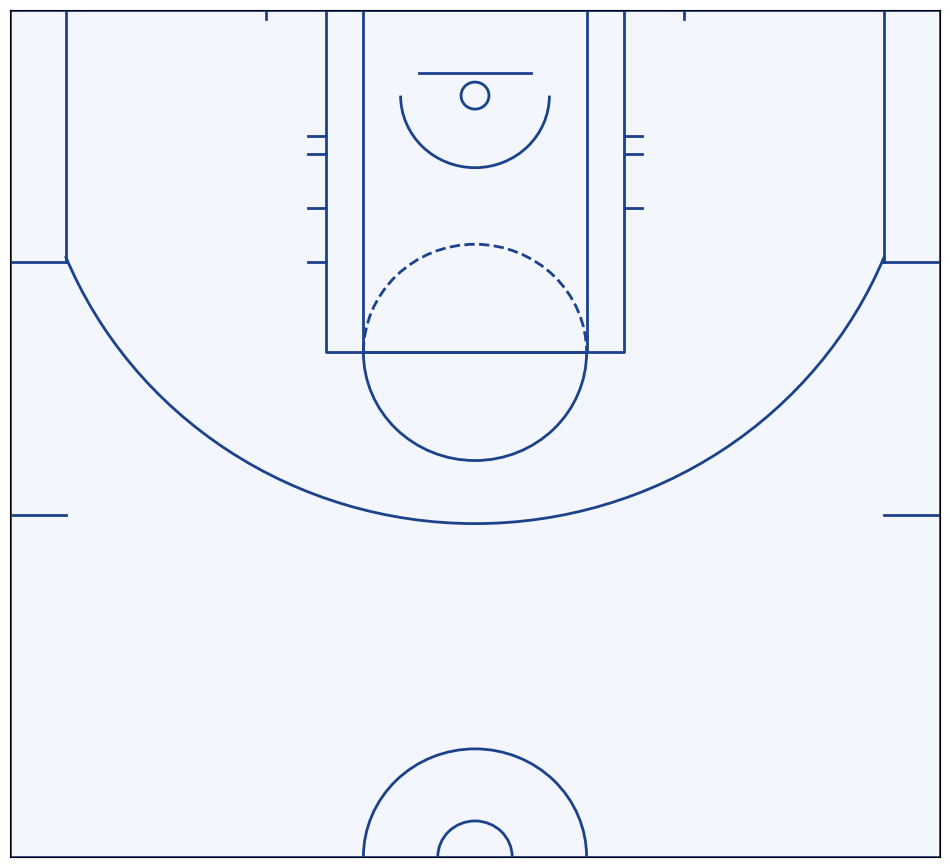

In [58]:
shot_chart(data)
plt.rcParams['figure.figsize'] = (12, 11)
plt.show()